# Problem Statement
## Prepare a prediction model for profit of 50_startups data.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups (2).csv


In [ ]:
df=pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Data Analysis

In [ ]:
df.shape

(50, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## EDA

In [ ]:
#Checking for null values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
data=pd.get_dummies(df,['State'])
data

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [ ]:
#Renaming the columns
data.rename(columns={'R&D Spend':'RD','Marketing Spend':'marketing','Administration':'admin','State_California':'SC','State_Florida':'SF','State_New York':'SN'},inplace=True)

In [ ]:
data.describe()

,RD,admin,marketing,Profit,SC,SF,SN
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.340000,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.478518,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000,1.000000


In [ ]:
data[data['RD']==0]

,RD,admin,marketing,Profit,SC,SF,SN
47,0.0,135426.92,0.00,42559.73,1,0,0
49,0.0,116983.80,45173.06,14681.40,1,0,0


In [ ]:
data[data.marketing==0]

,RD,admin,marketing,Profit,SC,SF,SN
19,86419.70,153514.11,0.0,122776.86,0,0,1
47,0.00,135426.92,0.0,42559.73,1,0,0
48,542.05,51743.15,0.0,35673.41,0,0,1


## Checking for data distributions

<Axes: xlabel='admin', ylabel='Density'>

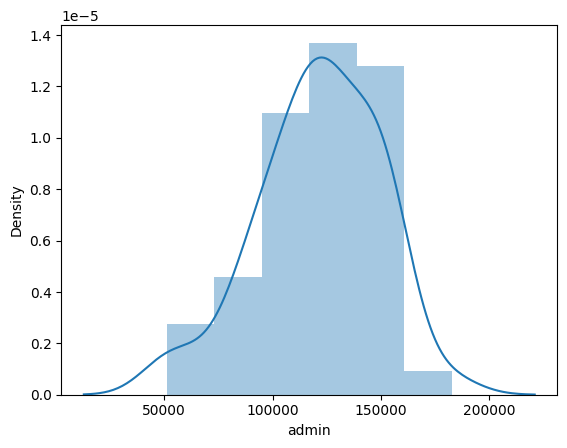

In [ ]:
sn.distplot(data.admin)

<Axes: xlabel='RD', ylabel='Density'>

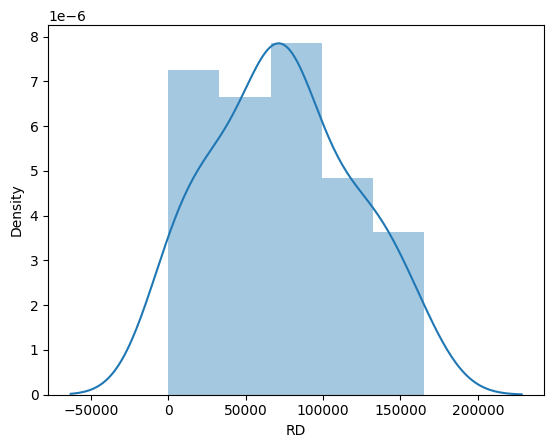

In [ ]:
sn.distplot(data.RD)

<Axes: xlabel='marketing', ylabel='Density'>

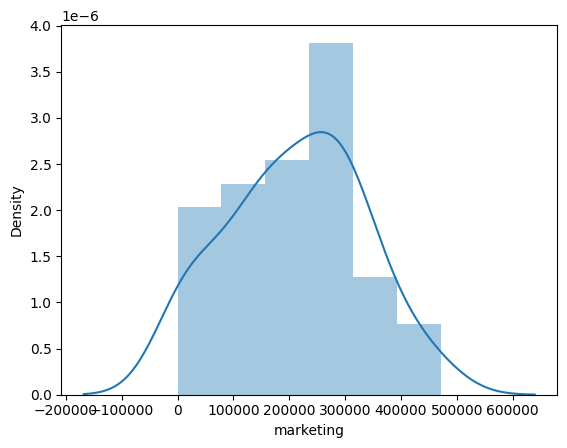

In [ ]:
sn.distplot(data.marketing)

<Axes: xlabel='Profit', ylabel='Density'>

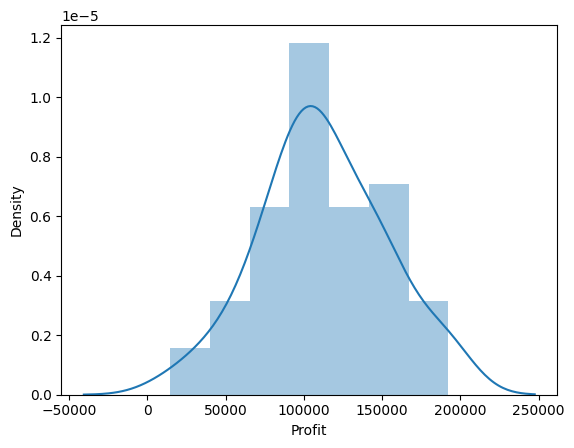

In [ ]:
sn.distplot(data.Profit)

Outlier Detection

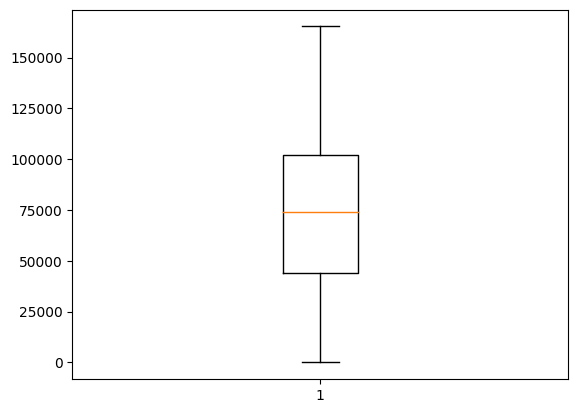

In [ ]:
plt.boxplot(data.RD);

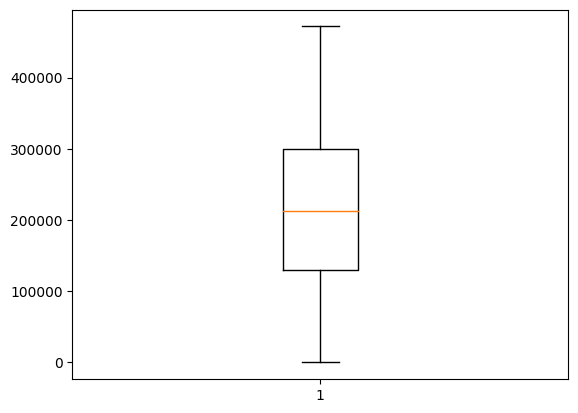

In [ ]:
plt.boxplot(data.marketing);

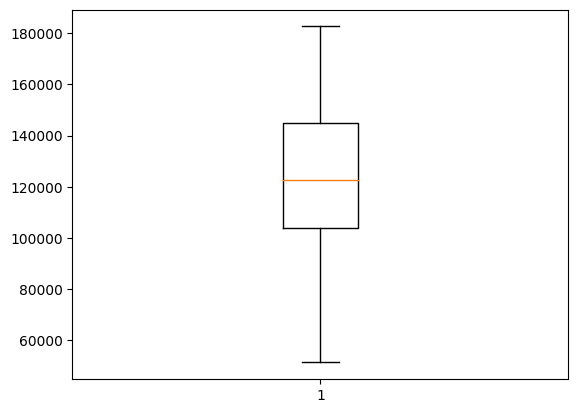

In [ ]:
plt.boxplot(data.admin);

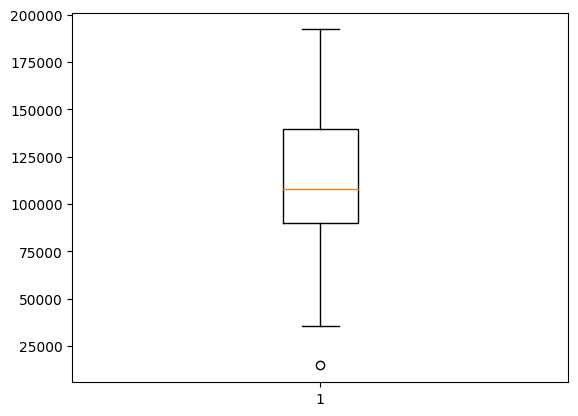

In [ ]:
plt.boxplot(data.Profit);

In [ ]:
data['Profit'].min()

14681.4

In [ ]:
data[data['Profit']==14681.4]

,RD,admin,marketing,Profit,SC,SF,SN
49,0.0,116983.8,45173.06,14681.4,1,0,0


In [ ]:
data=data.drop(49)

In [ ]:
data.shape

(49, 7)

In [ ]:
data

,RD,admin,marketing,Profit,SC,SF,SN
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


Checking for correlations

In [ ]:
#Corelation matrix
data.corr()

,RD,admin,marketing,Profit,SC,SF,SN
RD,1.000000,0.243438,0.711654,0.978437,-0.101788,0.085734,0.015816
admin,0.243438,1.000000,-0.037280,0.205841,-0.011235,0.008334,0.002858
marketing,0.711654,-0.037280,1.000000,0.739307,-0.135188,0.191104,-0.055087
Profit,0.978437,0.205841,0.739307,1.000000,-0.083258,0.088008,-0.004679
SC,-0.101788,-0.011235,-0.135188,-0.083258,1.000000,-0.484848,-0.507519
SF,0.085734,0.008334,0.191104,0.088008,-0.484848,1.000000,-0.507519
SN,0.015816,0.002858,-0.055087,-0.004679,-0.507519,-0.507519,1.000000


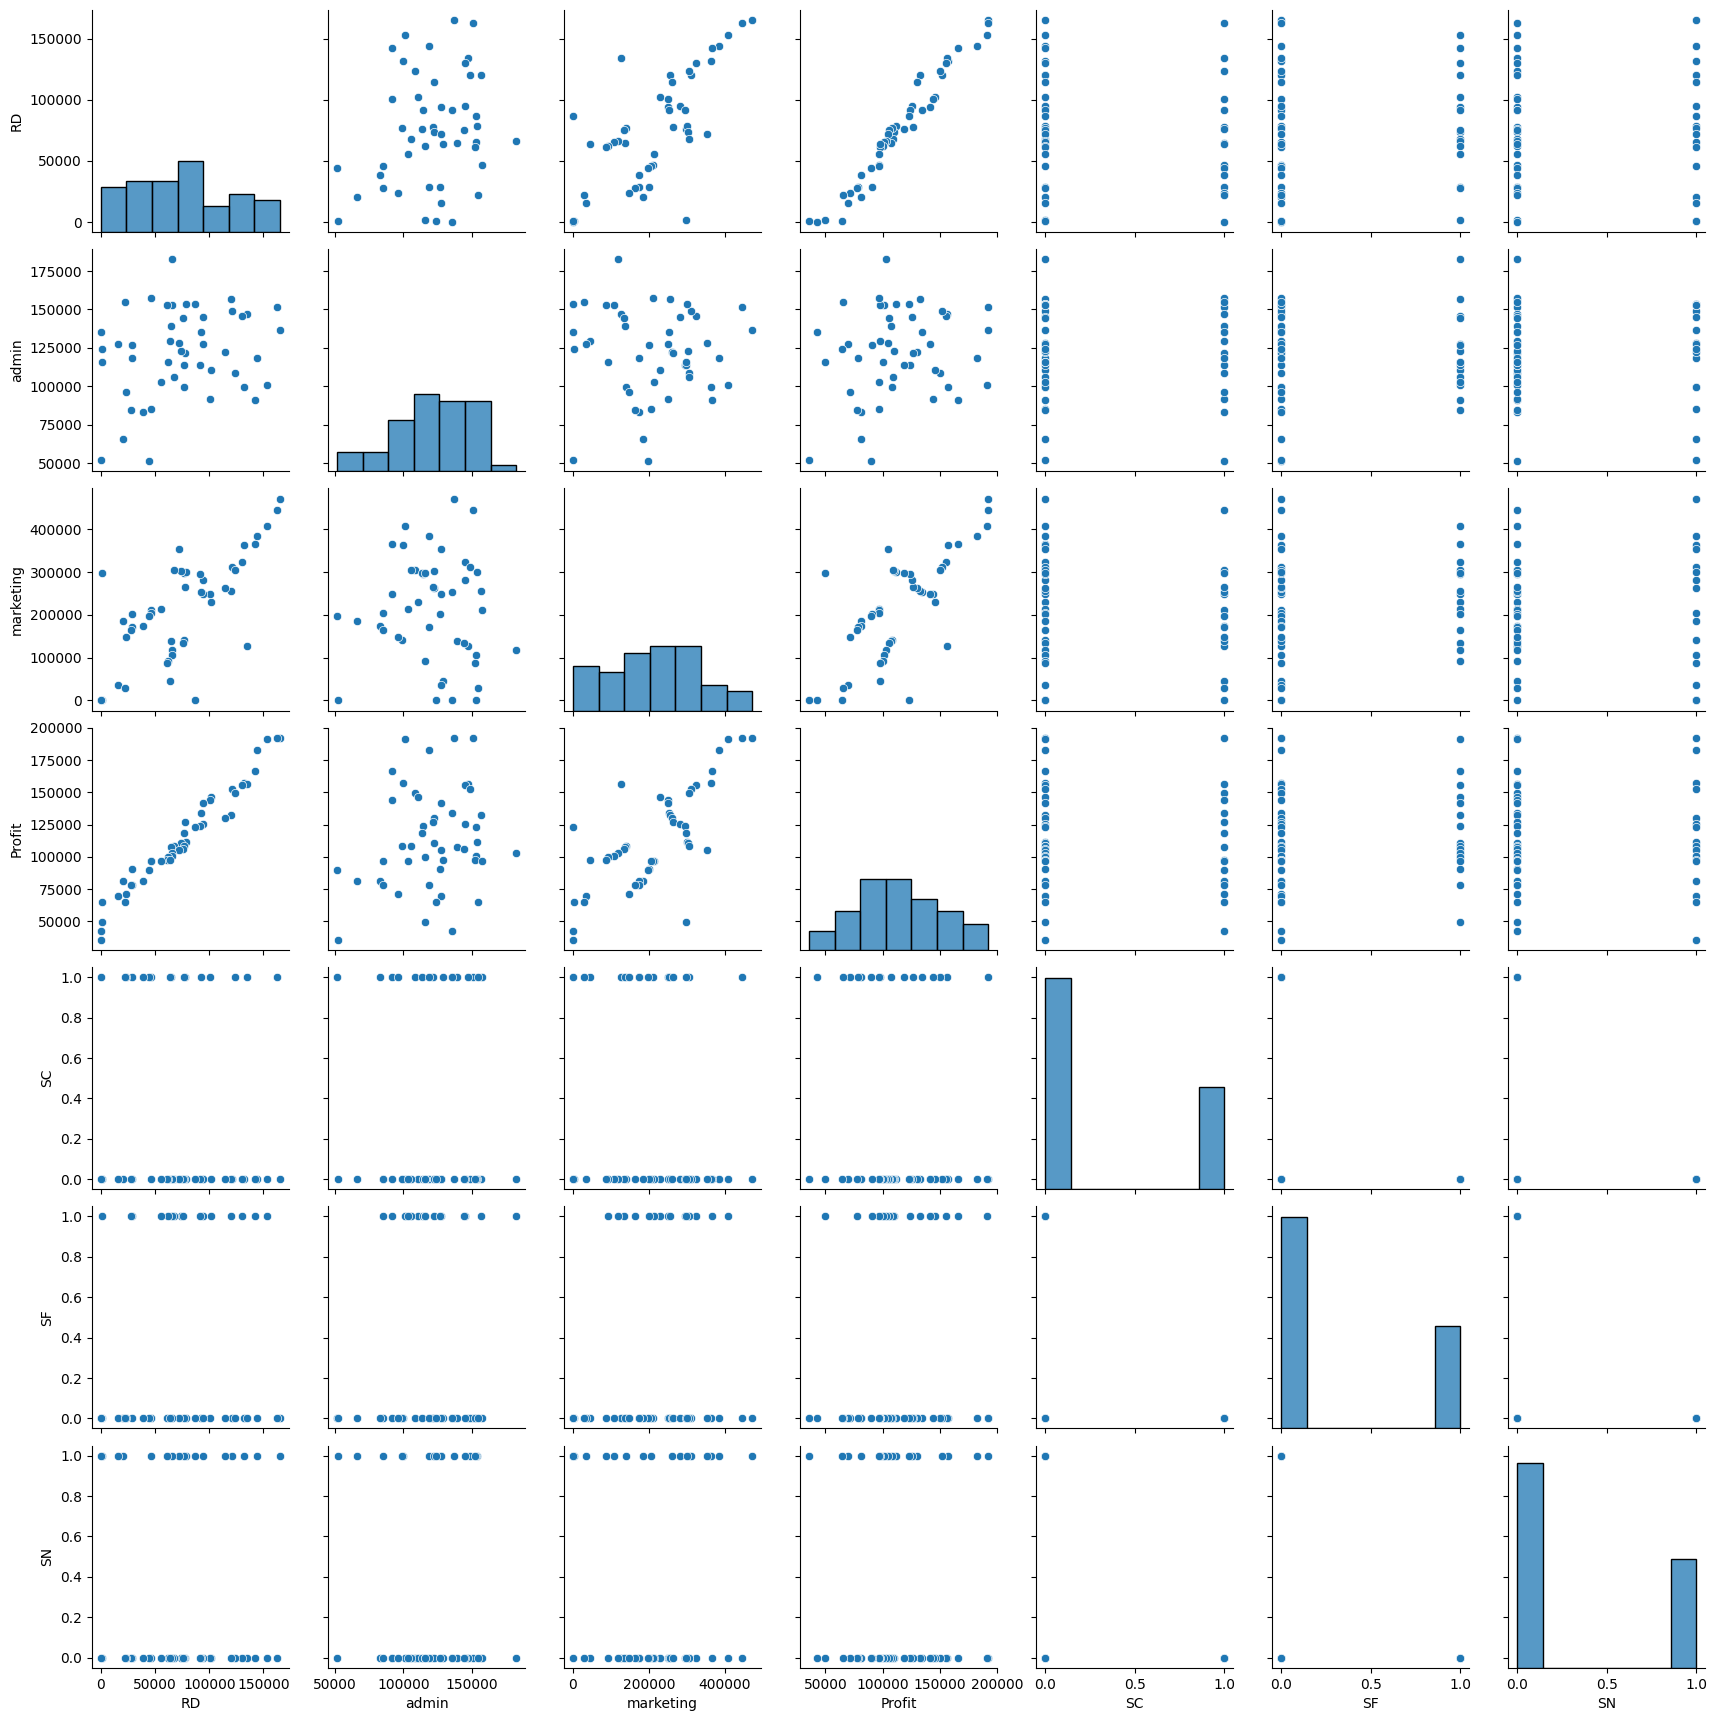

In [ ]:
sn.pairplot(data)

State_New York has very less correlation with the dependent variable Profit hence we can ignore it while preparing the model

## Preparing a model

In [ ]:
model=smf.ols('Profit~admin+marketing+RD+SC+SF',data=data).fit()

In [ ]:
model.rsquared

0.9618082858227786

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Sat, 20 May 2023   Prob (F-statistic):           2.51e-29
Time:                        14:11:23   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.143e+04   5812.919      8.847      0.000    3.97e+04    6.31e+04
admin         -0.0220      0.044     -0.505      0.616      -0.110       0.066
marketing      0.0258      0.014      1.804      0.078      -0.003       0.055
RD             0.7836      0.039     20.056      0.000       0.705       0.862
SC          1954.0177   2751.932      0.710      0.482   -3595.783    7503.818
SF           389.7935   2788.050      0.140      0.889   -5232.845    6012.432
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Simple Linear Model

In [ ]:
sm_r=smf.ols('Profit~RD',data=data).fit()
sm_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Sat, 20 May 2023   Prob (F-statistic):           7.56e-34
Time:                        14:11:23   Log-Likelihood:                -508.68
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      47   BIC:                             1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.172e+04   2229.914     23.195      0.000    4.72e+04    5.62e+04
RD             0.8278      0.025     32.477      0.000       0.777       0.879
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
sm_a=smf.ols('Profit~admin',data=data).fit()
sm_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.080
Date:                Sat, 20 May 2023   Prob (F-statistic):              0.156
Time:                        14:11:23   Log-Likelihood:                -584.90
No. Observations:                  49   AIC:                             1174.
Df Residuals:                      47   BIC:                             1178.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.029e+04    2.4e+04      3.346      0.002     3.2e+04    1.29e+05
admin          0.2776      0.193      1.442      0.156      -0.110       0.665
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                1.052
Skew:                           0.310   Prob(JB):                        0.591
Kurtosis:                       2.639   Cond. No.                     5.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
sm_m=smf.ols('Profit~marketing',data=data).fit()
sm_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     56.66
Date:                Sat, 20 May 2023   Prob (F-statistic):           1.30e-09
Time:                        14:11:23   Log-Likelihood:                -566.59
No. Observations:                  49   AIC:                             1137.
Df Residuals:                      47   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.406e+04   7601.574      8.428      0.000    4.88e+04    7.94e+04
marketing      0.2329      0.031      7.527      0.000       0.171       0.295
==============================================================================
Omnibus:                        4.458   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.096
Skew:                          -0.303   Prob(JB):                        0.129
Kurtosis:                       4.281   Cond. No.                     5.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
sm_sf=smf.ols('Profit ~ SF',data=data).fit()
sm_sf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.3669
Date:                Sat, 20 May 2023   Prob (F-statistic):              0.548
Time:                        14:11:23   Log-Likelihood:                -585.77
No. Observations:                  49   AIC:                             1176.
Df Residuals:                      47   BIC:                             1179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.117e+05   6689.022     16.697      0.000    9.82e+04    1.25e+05
SF          7090.2010   1.17e+04      0.606      0.548   -1.65e+04    3.06e+04
==============================================================================
Omnibus:                        0.679   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.712   Jarque-Bera (JB):                0.761
Skew:                           0.250   Prob(JB):                        0.683
Kurtosis:                       2.649   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sm_sc=smf.ols('Profit ~ SC',data=data).fit()
sm_sc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.3281
Date:                Sat, 20 May 2023   Prob (F-statistic):              0.570
Time:                        14:11:23   Log-Likelihood:                -585.79
No. Observations:                  49   AIC:                             1176.
Df Residuals:                      47   BIC:                             1179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.162e+05   6691.764     17.363      0.000    1.03e+05     1.3e+05
SC         -6707.5503   1.17e+04     -0.573      0.570   -3.03e+04    1.69e+04
==============================================================================
Omnibus:                        0.566   Durbin-Watson:                   0.036
Prob(Omnibus):                  0.753   Jarque-Bera (JB):                0.671
Skew:                           0.225   Prob(JB):                        0.715
Kurtosis:                       2.644   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The rsquare for state florida and state california is very low even p-value is quite high hence we can ignore it in the model

### Model Validation ~ Calculating VIF

In [ ]:
rsq_r=smf.ols('RD~admin+marketing',data=data).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols('admin~RD+marketing',data=data).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols('marketing~admin+RD',data=data).fit().rsquared
vif_m=1/(1-rsq_m)

vdf=pd.DataFrame({'Variables':['RD_Spend','Administration','Marketing_Spend'],'VIF':[vif_r,vif_a,vif_m]})
vdf

,Variables,VIF
0,RD_Spend,2.377754
1,Administration,1.175172
2,Marketing_Spend,2.239957


The VIF values are less hence,the independent variables are independent of each other

Test for Normality

In [ ]:
model1=smf.ols("Profit ~ RD+marketing+admin",data=data).fit()
model1.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7f1591e48a60>>

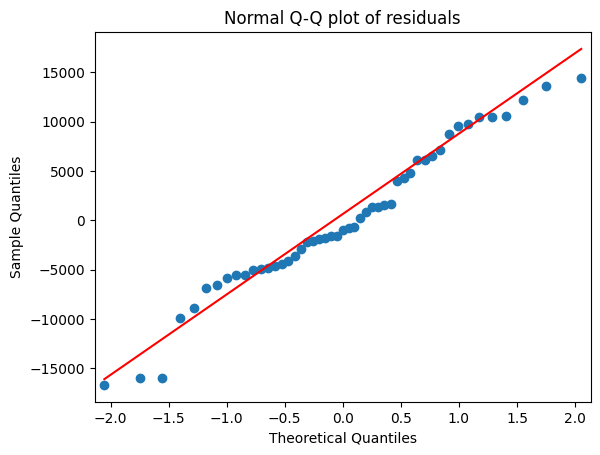

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

<Axes: >

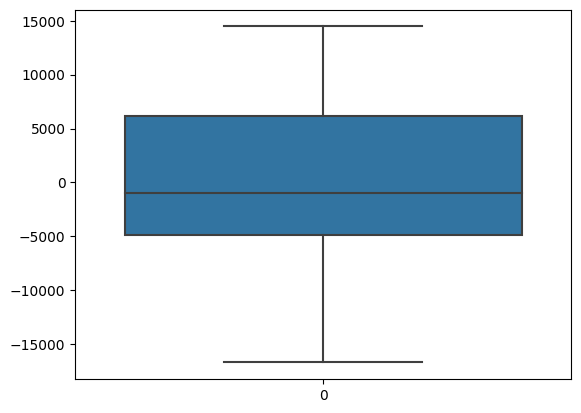

In [ ]:
sn.boxplot(model1.resid)

### Residual plot for Homoscedasticity

In [ ]:
def get_values(vals):
  return (vals-vals.mean())/vals.std()

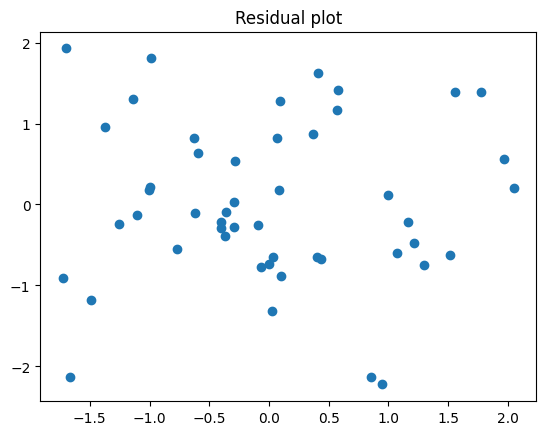

In [ ]:
plt.scatter(get_values(model1.fittedvalues),get_values(model1.resid))
plt.title('Residual plot')
plt.show()

eval_env: 1


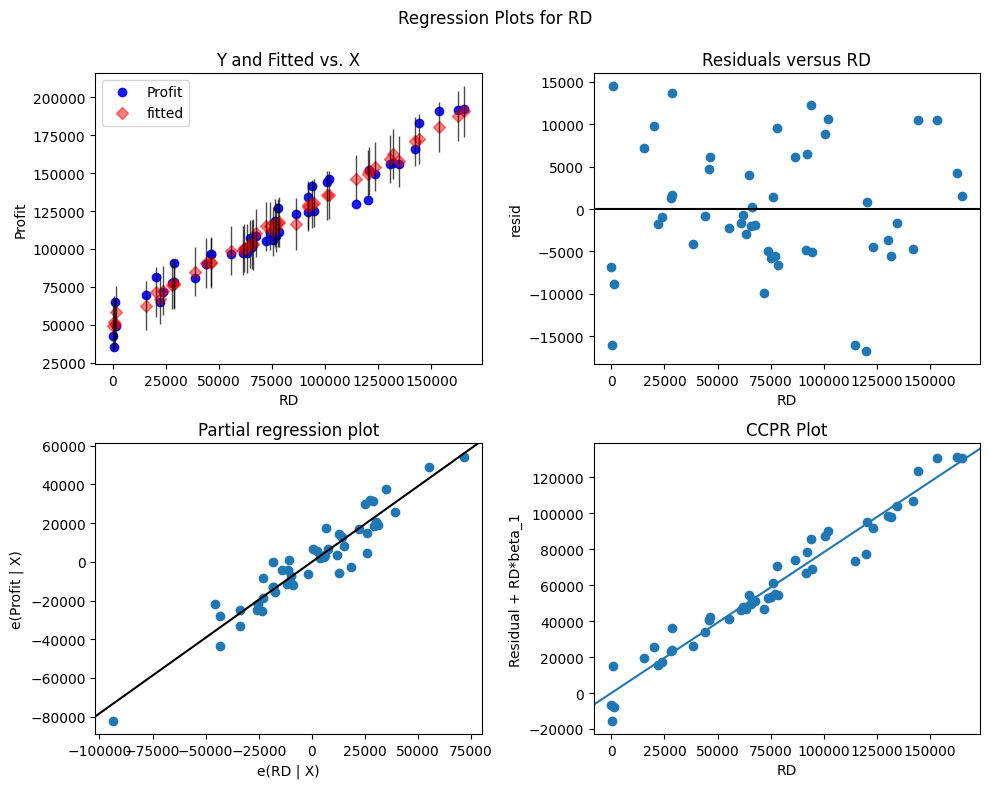

In [ ]:
f=plt.figure(figsize=(10,8))
fig=sm.graphics.plot_regress_exog(model1,'RD',fig=f)

eval_env: 1


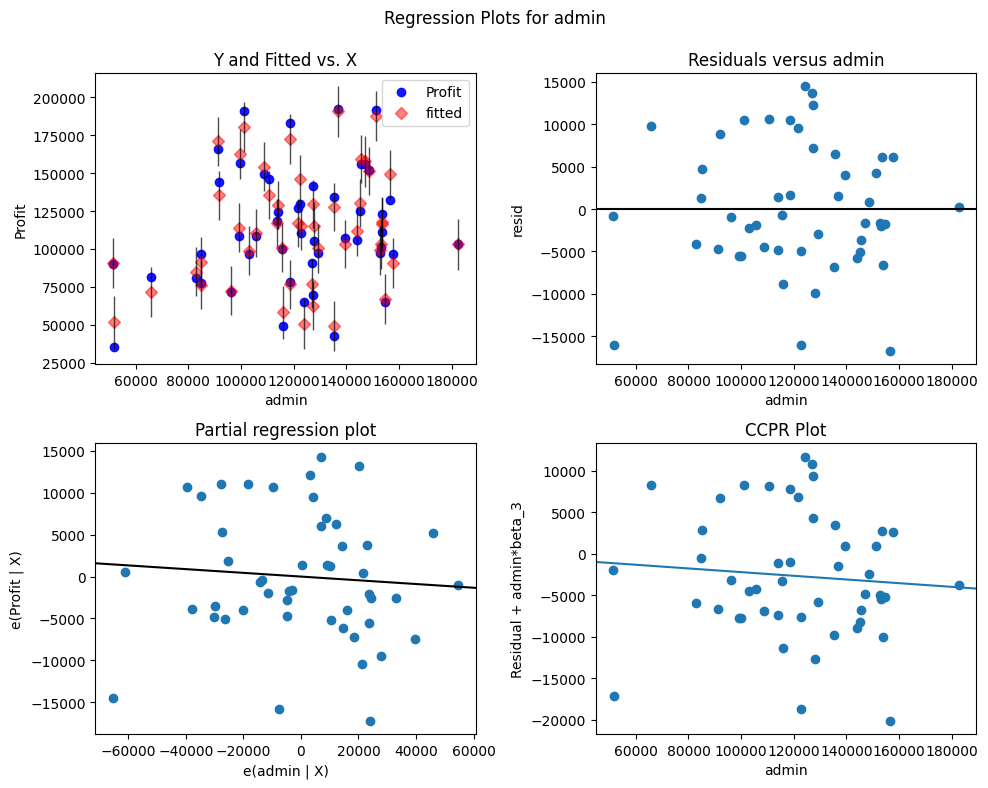

In [ ]:
f=plt.figure(figsize=(10,8))
fig=sm.graphics.plot_regress_exog(model1,'admin',fig=f)

eval_env: 1


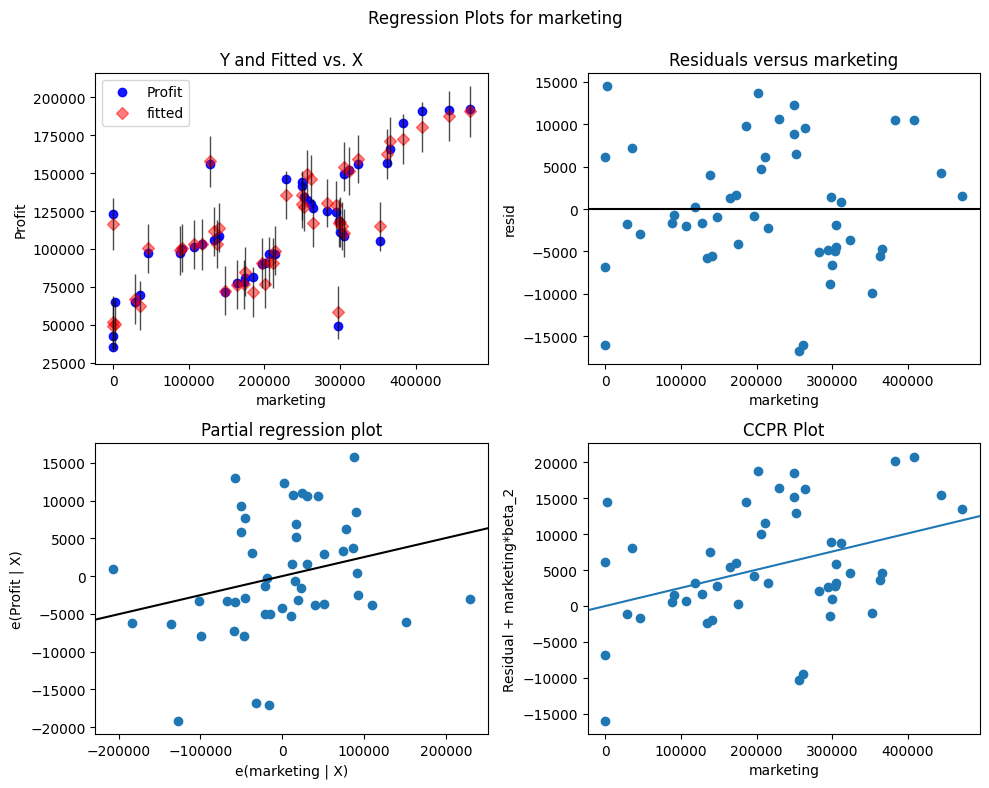

In [ ]:
f=plt.figure(figsize=(10,8))
fig=sm.graphics.plot_regress_exog(model1,'marketing',fig=f)

### Cooks Distance

In [ ]:
model_influence=model1.get_influence()
(c,_)=model_influence.cooks_distance

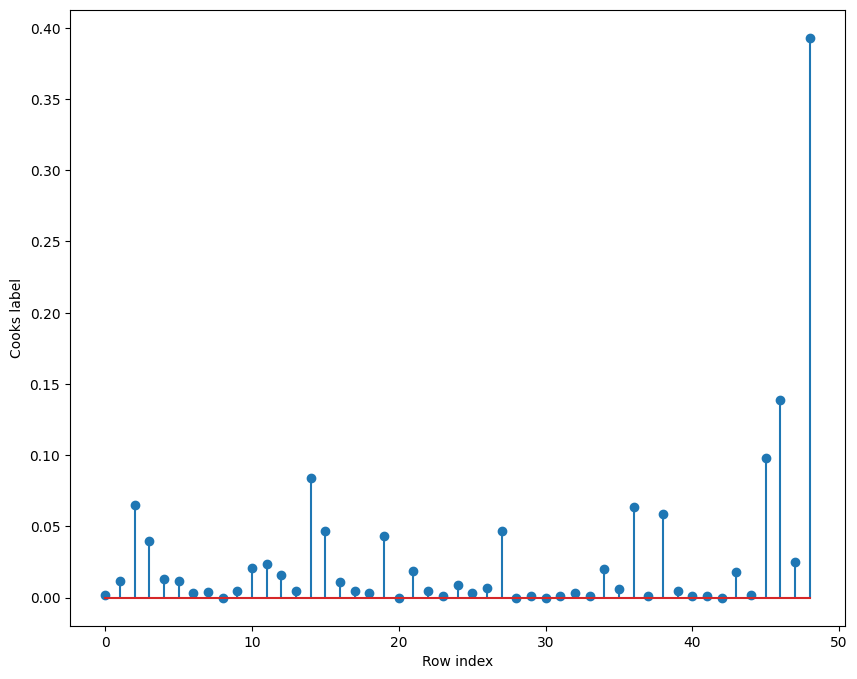

In [ ]:
fig=plt.figure(figsize=(10,8))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks label')
plt.show()


In [ ]:
np.argmax(c),np.max(c)

(48, 0.3927442055632167)

In [ ]:
data.shape

(49, 7)

In [ ]:
k=3
n=49
lev_cutoff=3*((k+1)/n)
lev_cutoff

0.24489795918367346

From the plot it is evident that datapoint 48 is the influencer

In [ ]:
data[data.index==48]

,RD,admin,marketing,Profit,SC,SF,SN
48,542.05,51743.15,0.0,35673.41,0,0,1


In [ ]:
#discarding the influencer to improve the model
data.drop(data.index[48],axis=0,inplace=True)

In [ ]:
data.shape

(48, 7)

## Final MODEL

In [ ]:
final_model=smf.ols('Profit~RD+admin+marketing',data=data).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Sat, 20 May 2023   Prob (F-statistic):           2.03e-31
Time:                        14:20:44   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RD             0.7895      0.036     21.718      0.000       0.716       0.863
admin         -0.0633      0.044     -1.442      0.156      -0.152       0.025
marketing      0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model final_model1 is taken as it has higher rsquared and lower AIC value

In [ ]:
final_model.resid

0      3322.552516
1      6413.480873
2     10326.035810
3     10865.813027
4     -5500.401312
5     -6030.880480
6     -2087.104122
7     -2468.307984
8      2102.070710
9     -4978.733091
10     9697.953392
11     7276.322459
12    12226.663984
13     6896.046031
14   -15607.083354
15   -16252.312040
16     9540.456606
17    -4043.028834
18    -5016.815044
19     5175.388064
20     1340.968783
21    -4996.207099
22    -4510.961696
23    -2130.910559
24    -7457.948463
25     3763.061939
26    -5970.622860
27    -8885.682032
28     1610.843524
29    -2004.726384
30    -2319.139372
31    -1698.734414
32    -4324.317668
33    -3229.414349
34     7389.504597
35     2968.649909
36    13630.673333
37    -4022.413437
38     7207.113559
39    -6234.245930
40     1030.428705
41     -733.354335
42    -2671.343041
43     5887.983131
44    -2079.280923
45    12870.713444
46    -8329.151390
47    -7959.604182
dtype: float64

In [ ]:
final_data=df
final_data['Predicted Values']=final_model.fittedvalues
final_data['Errors']=final_model.resid
final_data

,R&D Spend,Administration,Marketing Spend,State,Profit,Predicted Values,Errors
0,165349.20,136897.80,471784.10,New York,192261.83,188939.277484,3322.552516
1,162597.70,151377.59,443898.53,California,191792.06,185378.579127,6413.480873
2,153441.51,101145.55,407934.54,Florida,191050.39,180724.354190,10326.035810
3,144372.41,118671.85,383199.62,New York,182901.99,172036.176973,10865.813027
4,142107.34,91391.77,366168.42,Florida,166187.94,171688.341312,-5500.401312
5,131876.90,99814.71,362861.36,New York,156991.12,163022.000480,-6030.880480
6,134615.46,147198.87,127716.82,California,156122.51,158209.614122,-2087.104122
7,130298.13,145530.06,323876.68,Florida,155752.60,158220.907984,-2468.307984
8,120542.52,148718.95,311613.29,New York,152211.77,150109.699290,2102.070710
9,123334.88,108679.17,304981.62,California,149759.96,154738.693091,-4978.733091


R-square table for different MLR models created

In [ ]:
rsqaure_table=pd.DataFrame({'Models':['model','model1','final_model'],'R-square values':[model.rsquared,model1.rsquared,final_model.rsquared]})
rsqaure_table

,Models,R-square values
0,model,0.961808
1,model1,0.961316
2,final_model,0.962677
